# Text Label 

In [ ]:
events_text = {'act01': 'write an email',
                'act02': 'read on screen',
                'act03': 'edit/create presentation',
                'act04': 'zone out and fixate',
                'act05': 'use a calculator to add up numbers on sheet',
                'act06': 'physical precision task',
                'act07': 'put documents in order',
                'act08': 'read text/numbers on page',
                'act09': 'arrange money in change jar',
                'act10': 'write on paper with pen',
                'act11': 'watch a youtube video',
                'act12': 'go to a news website and browse',
                'act13': 'have conversation with experimenter in room',
                'act14': 'make a telephone call',
                'act15': 'drink/eat for 2 minutes',
                'act16': 'close eyes and sit still',
                'act17': 'clean e.g. sweaping the floor, wipe, ...',
                'act18': 'exercise: sit up/stand down repeatedly',
                'act19': 'hand-eye coordination (tennis ball)',
                'act20': 'pace the room',
                }

# COMBINE BOTH A and B dataset

## Split data

In [1]:
import os
import random
random.seed(1509)

FOLDER = '/mnt/sda/hong01-data/MART_DATA/OUTPUT_MERGED/AUTOGRAPHER'
all_files = sorted(os.listdir(FOLDER))
availabel = [x for x in all_files if 'train' in x]

In [2]:
len(availabel) # number of availabel label

1830

In [3]:
len(all_files) # total files

2752

In [4]:
activities = {}
list_activity = ['0'+str(x) for x in range(1, 10)]
list_activity += [str(x) for x in range(10, 21)]

In [5]:
for act in list_activity:
    img_act = [x for x in availabel if f"act{act}" in x]
    activities[act] = img_act
    print(f"Numb Images in act{act}: {len(img_act)}")

Numb Images in act01: 97
Numb Images in act02: 108
Numb Images in act03: 100
Numb Images in act04: 115
Numb Images in act05: 88
Numb Images in act06: 85
Numb Images in act07: 78
Numb Images in act08: 105
Numb Images in act09: 76
Numb Images in act10: 94
Numb Images in act11: 111
Numb Images in act12: 106
Numb Images in act13: 80
Numb Images in act14: 97
Numb Images in act15: 85
Numb Images in act16: 110
Numb Images in act17: 78
Numb Images in act18: 72
Numb Images in act19: 76
Numb Images in act20: 69


In [6]:
train_activities = {}
val_activities = {}
test_activities = {}

train_portion = 0.8
val_portion = 0.1

for idx, act in enumerate(list_activity):
    imgs = activities[act]
    numb_imgs = len(imgs)
    numb_train = int(train_portion * numb_imgs)
    numb_val = int(val_portion * numb_imgs)
    
    random.seed(1509+idx)
    random.shuffle(imgs)
    
    train_activities[act] = imgs[0:numb_train]
    val_activities[act] = imgs[numb_train:(numb_train+numb_val)]
    test_activities[act] = imgs[(numb_train+numb_val):]

In [9]:
train_activities['01'][0:5]

['1005_trainA_act01_6.jpg',
 '1003_trainA_act01_0.jpg',
 '1001_trainA_act01_5.jpg',
 '1006_trainA_act01_0.jpg',
 '1001_trainB_act01_5.jpg']

## Export to TXT Files

In [11]:
list_train_txt = []
list_val_txt = []
list_test_txt = []

for act in list_activity:
    list_train_txt += [f"{x} {act}" for x in train_activities[act]]
    list_val_txt += [f"{x} {act}" for x in val_activities[act]]
    list_test_txt += [f"{x} {act}" for x in test_activities[act]]

In [12]:
print(f"Train: {len(list_train_txt)}\nVal: {len(list_val_txt)}\nTest: {len(list_test_txt)}")

Train: 1457
Val: 173
Test: 200


In [13]:
random.seed(1309)
random.shuffle(list_train_txt)
random.shuffle(list_val_txt)
random.shuffle(list_test_txt)

In [14]:
list_train_txt[0:5]

['1005_trainB_act19_1.jpg 19',
 '1007_trainA_act01_1.jpg 01',
 '1004_trainA_act16_7.jpg 16',
 '1005_trainA_act08_4.jpg 08',
 '1004_trainA_act11_8.jpg 11']

In [18]:
with open('train.txt', 'w') as f:
    for line in list_train_txt:
        f.write(f'{line}\n')

In [19]:
with open('val.txt', 'w') as f:
    for line in list_val_txt:
        f.write(f'{line}\n')

In [20]:
with open('test.txt', 'w') as f:
    for line in list_test_txt:
        f.write(f'{line}\n')

# Train on dataset A but validate and test on B

In [15]:
import os
import random
random.seed(1509)

FOLDER = '/mnt/sda/hong01-data/MART_DATA/OUTPUT_MERGED/AUTOGRAPHER'
all_files = sorted(os.listdir(FOLDER))
availabelA = [x for x in all_files if 'trainA' in x]
availabelB = [x for x in all_files if 'trainB' in x]

In [16]:
len(availabelA)

918

In [17]:
len(availabelB)

912

In [18]:
list_activity = ['0'+str(x) for x in range(1, 10)]
list_activity += [str(x) for x in range(10, 21)]
for act in list_activity:
    img_act = [x for x in availabelA if f"act{act}" in x]
    print(f"Numb Images in act{act}: {len(img_act)}")

Numb Images in act01: 47
Numb Images in act02: 52
Numb Images in act03: 49
Numb Images in act04: 57
Numb Images in act05: 47
Numb Images in act06: 42
Numb Images in act07: 38
Numb Images in act08: 53
Numb Images in act09: 37
Numb Images in act10: 46
Numb Images in act11: 56
Numb Images in act12: 55
Numb Images in act13: 38
Numb Images in act14: 51
Numb Images in act15: 44
Numb Images in act16: 56
Numb Images in act17: 38
Numb Images in act18: 38
Numb Images in act19: 40
Numb Images in act20: 34


In [19]:
list_train_txt = [f"{x} {x.split('_')[-2][-2:]}" for x in availabelA]

In [20]:
list_train_txt[0:5]

['1001_trainA_act01_0.jpg 01',
 '1001_trainA_act01_1.jpg 01',
 '1001_trainA_act01_2.jpg 01',
 '1001_trainA_act01_3.jpg 01',
 '1001_trainA_act01_4.jpg 01']

In [10]:
random.seed(1309)
random.shuffle(list_train_txt)
with open('dataset/train_A.txt', 'w') as f:
    for line in list_train_txt:
        f.write(f'{line}\n')

In [12]:
activities = {}
list_activity = ['0'+str(x) for x in range(1, 10)]
list_activity += [str(x) for x in range(10, 21)]
for act in list_activity:
    img_act = [x for x in availabelB if f"act{act}" in x]
    activities[act] = img_act
    print(f"Numb Images in act{act}: {len(img_act)}")

Numb Images in act01: 50
Numb Images in act02: 56
Numb Images in act03: 51
Numb Images in act04: 58
Numb Images in act05: 41
Numb Images in act06: 43
Numb Images in act07: 40
Numb Images in act08: 52
Numb Images in act09: 39
Numb Images in act10: 48
Numb Images in act11: 55
Numb Images in act12: 51
Numb Images in act13: 42
Numb Images in act14: 46
Numb Images in act15: 41
Numb Images in act16: 54
Numb Images in act17: 40
Numb Images in act18: 34
Numb Images in act19: 36
Numb Images in act20: 35


In [15]:
val_activities = {}
test_activities = {}

val_portion = 0.7

for idx, act in enumerate(list_activity):
    imgs = activities[act]
    numb_imgs = len(imgs)
    numb_val = int(val_portion * numb_imgs)
    
    random.seed(1509+idx)
    random.shuffle(imgs)
    
    val_activities[act] = imgs[0:numb_val]
    test_activities[act] = imgs[numb_val:]
    
list_val_txt = []
list_test_txt = []

for act in list_activity:
    list_val_txt += [f"{x} {act}" for x in val_activities[act]]
    list_test_txt += [f"{x} {act}" for x in test_activities[act]]

In [19]:
random.seed(1309)
random.shuffle(list_val_txt)
random.shuffle(list_test_txt)

In [20]:
with open('dataset/val_B.txt', 'w') as f:
    for line in list_val_txt:
        f.write(f'{line}\n')
with open('dataset/test_B.txt', 'w') as f:
    for line in list_test_txt:
        f.write(f'{line}\n')

# TEST THE MODEL

In [1]:
from mart_controller import MART_Evaluator
from PIL import Image

/home/hong01/anaconda3/envs/cxr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.ranking module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
MODEL_NAME = 'EFFICIENT-B4'
CROP_SIZE = 224
CHECKPOINT = 'RUN_1/EFFICIENT-B4-14082020-164740.pth.tar'

model_info = {}
model_info['model_name'] = MODEL_NAME
model_info['crop_size'] = CROP_SIZE
model_info['checkpoint'] = CHECKPOINT

evaluator = MART_Evaluator(model_info)

Loaded pretrained weights for efficientnet-b4
LOAD PRETRAINED MODEL AT RUN_1_LogSoftMax/EFFICIENT-B4-14082020-164740.pth.tar


## Evaluate on TXT File

In [8]:
DATA_DIR = '/mnt/sda/hong01-data/MART_DATA/OUTPUT_MERGED/AUTOGRAPHER'
TXT_FILE = 'dataset/val.txt'

loss, acc = evaluator.evaluate(DATA_DIR, TXT_FILE)
(loss, acc)

(0.9506821876222437, 0.815028901734104)

## Test on Custom Image

In [9]:
events_text = ['write an email', 'read on screen', 'edit/create presentation', 'zone out and fixate',
               'use a calculator to add up numbers on sheet', 'physical precision task', 'put documents in order',
               'read text/numbers on page', 'arrange money in change jar', 'write on paper with pen',
               'watch a youtube video', 'go to a news website and browse', 
               'have conversation with experimenter in room', 'make a telephone call',
               'drink/eat for 2 minutes', 'close eyes and sit still', 'clean e.g. sweaping the floor, wipe, ...',
               'exercise: sit up/stand down repeatedly',
               'hand-eye coordination (tennis ball)', 'pace the room']

In [27]:
img_path = f"{DATA_DIR}/1005_trainB_act17_4.jpg"
image = Image.open(img_path).convert('RGB')

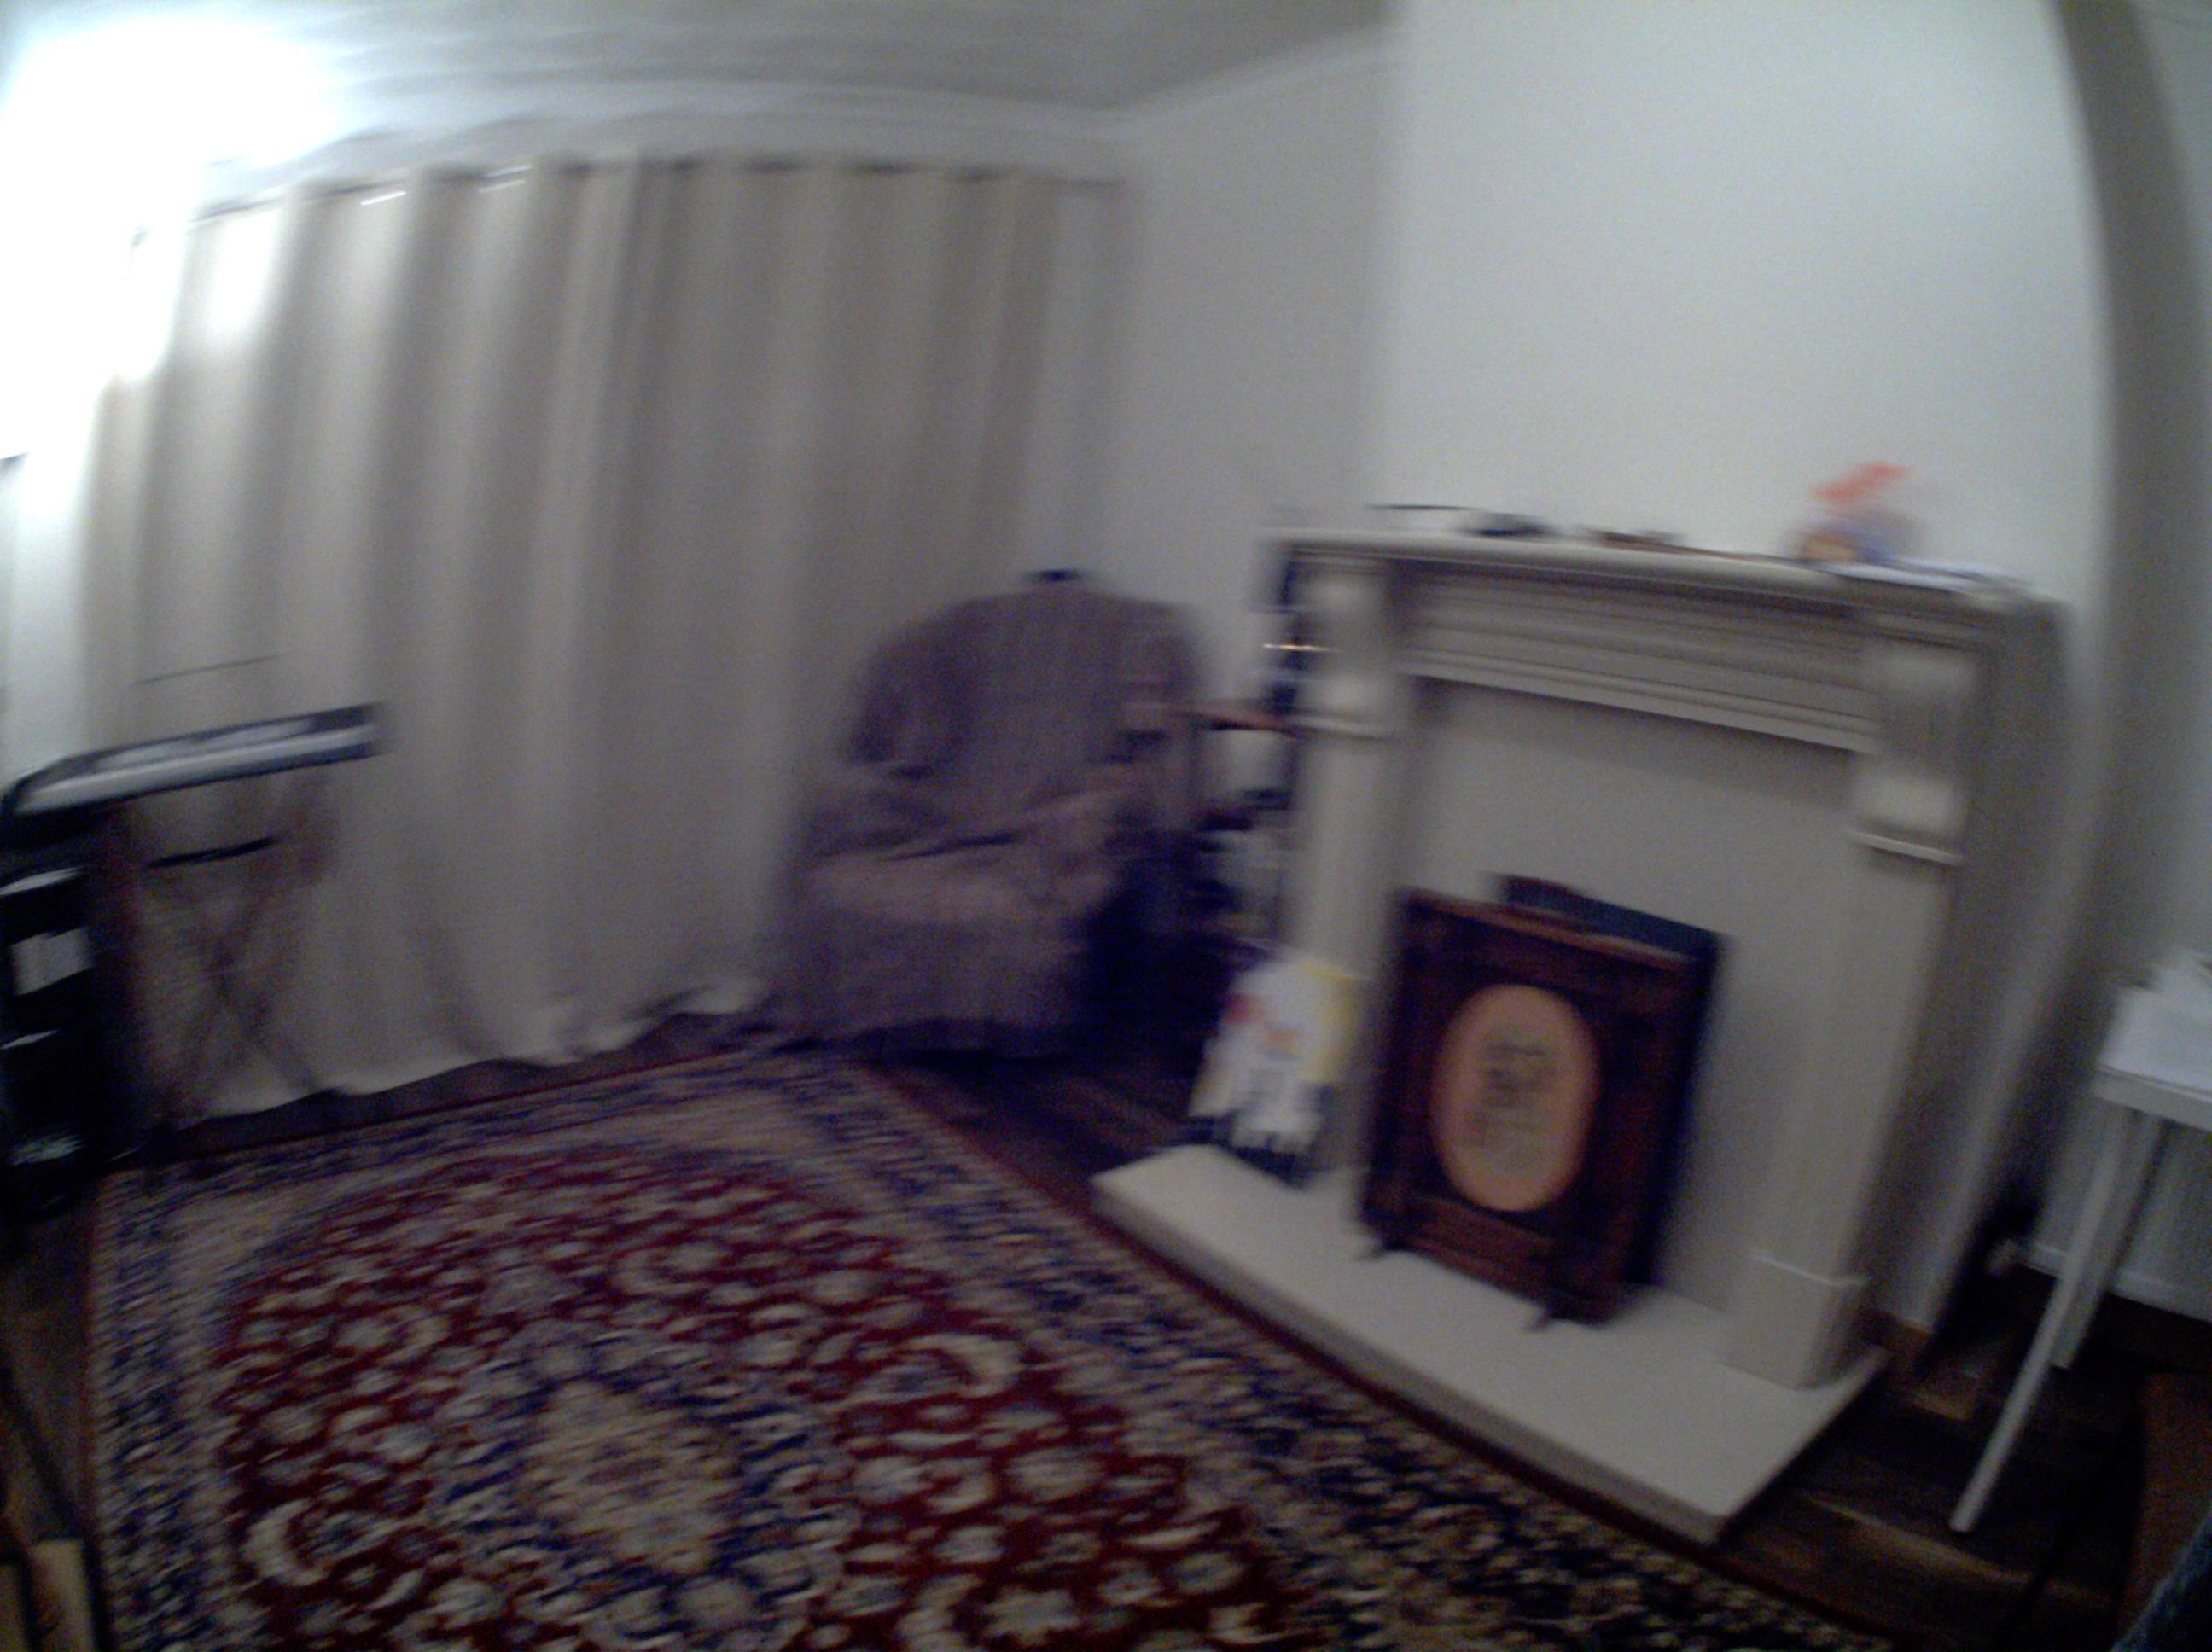

In [28]:
image

In [29]:
pred_lbl, probs = evaluator.test_image(img_path)

In [34]:
pred_act = pred_lbl.item() # note that act = label + 1 (this prediction is an index)
print(f"act{pred_act+1}: {events_text[pred_act]}")

act17: clean e.g. sweaping the floor, wipe, ...


In [31]:
props_logsoftmax = probs.cpu().numpy() # this is log_softmax [-inf, 0]
props_logsoftmax

array([[-13.6726465 , -12.045168  , -12.250111  ,  -7.6595225 ,
         -9.922691  , -13.399968  ,  -7.7738523 , -10.680887  ,
         -8.193646  , -10.332358  ,  -9.482067  , -14.216136  ,
         -8.0708475 ,  -3.8158584 ,  -6.335001  ,  -7.4028974 ,
         -0.03981304,  -4.7003875 ,  -8.396099  ,  -5.6168528 ]],
      dtype=float32)